In [186]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # sklearn provides many dataset

# we are going to use torch to create a perceptron based neural network; training using graident decent


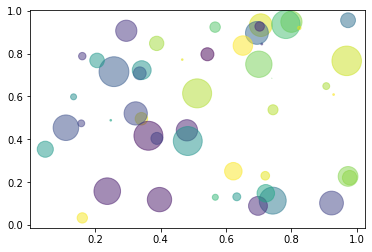

In [187]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N) #an array of 50 random generated numbers
y = np.random.rand(N) # an array
#print(y)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [188]:
# creating 100 data samples
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers= centers, cluster_std=0.4)
print(X)
print(X[y==0, 0]) # only pick the x axis value
print(X[y==0, 1]) # only pick the y axis value


[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

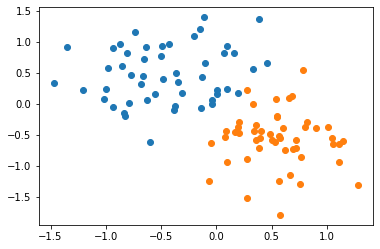

In [189]:
plt.scatter(X[y==0, 0], X[y==0, 1] ) # plot the data points with lable y=0
plt.scatter(X[y==1, 0], X[y==1, 1] ) # plot the data poionts with lable y=1

In [190]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1)) # reshape it, two dimentsions, 100 rows,and one column


In [191]:
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x) )
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [192]:
model = Model(2, 1)
print(list(model.parameters())) #weight 1, weight 2, and bias

[Parameter containing:
tensor([[ 0.6795, -0.0477]], requires_grad=True), Parameter containing:
tensor([-0.4358], requires_grad=True)]


In [193]:
[w, b] = model.parameters()
print (w,b)

Parameter containing:
tensor([[ 0.6795, -0.0477]], requires_grad=True) Parameter containing:
tensor([-0.4358], requires_grad=True)


In [194]:
print (w.view(2))

tensor([ 0.6795, -0.0477], grad_fn=<ViewBackward0>)


In [195]:
w1, w2 = w.view(2)
b1 = b[0]
print (w1.item(), w2.item(), b1.item())

def get_params():
  return (w1.item(), w2.item(), b1.item())

0.6794508695602417 -0.0476863756775856 -0.4358290135860443


In [196]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1] ) # plot the data points with lable y=0
  plt.scatter(X[y==1, 0], X[y==1, 1] ) # plot the data poionts with lable y=1

In [197]:
def plot_title(title):
  plt.title = title
  w1, w2, b1 = get_params()

  x1 = np.array([-2.0, 2.0])
  ##  w1*x1+w2*x2+b = 0, so w1*x1 +b = -w2*x2
  x2 = (w1*x1 +b1)/(-w2)   
  print (w1*x1 +b1)      
  plt.plot(x1, x2, 'r')
  scatter_plot()


[-1.79473075  0.92307273]


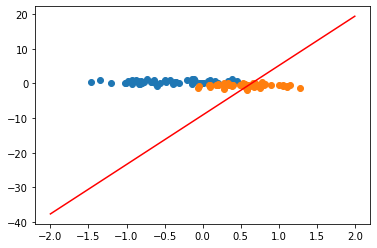

In [198]:
plot_title("Initial Model")

In [199]:
#binary corss entropy loss
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01  ) # stochastic gradient descent

In [200]:
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  #print ("epoch ", i, "loss: ", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() # used to update parameters



Text(0.5, 0, 'Epoch')

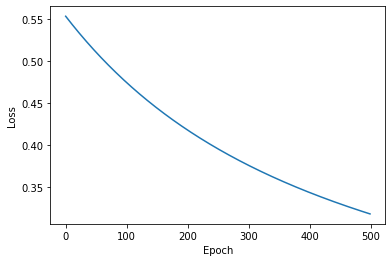

In [201]:
#scatter_plot()

plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

[-2.92905657  2.50381096]


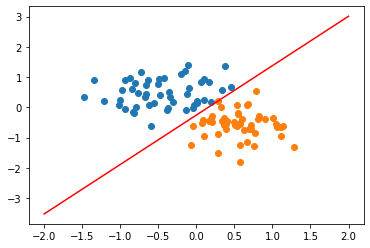

In [202]:
plot_title("Trained Model")

[-2.92905657  2.50381096]
red point in class1
black point in class0


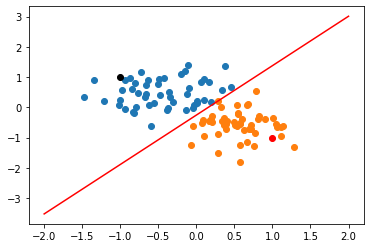

In [203]:
# make prediction
point1 = torch.Tensor([1.0, -1.0]) # define point 1 
point2 = torch.Tensor([-1.0, 1.0]) # define point 2
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro') # plot the position and class of 
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_title("Trained Model")
print("red point in class{}".format(model.predict(point1)))
print("black point in class{}".format(model.predict(point2)))

